Model Complexity in Ridge

• Apply Ridge Regression

• Target: house price

• Features: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX,
PTRATIO, B, LSTAT, MEDV

• Using different alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.001)

• Validate the model using MSE. Split the data into 20% testing data and 80%
training data

• Compare MSE obtained from training data and testing data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data

`CRIM`: Tingkat kejahatan per kapita menurut kota.

`ZN`: Persentase lahan perumahan yang di-zonasi untuk loteng di atas 25.000 kaki persegi.

`INDUS`: Persentase luas wilayah bisnis non-ritel per kota.

`CHAS`: Variabel dummy Charles River (= 1 jika properti berbatasan dengan sungai; 0 sebaliknya).

`NOX`: Konsentrasi oksida nitrat (bagian per 10 juta).

`RM`: Rata-rata jumlah kamar per hunian.

`AGE`: Persentase unit hunian yang dibangun sebelum tahun 1940.

`DIS`: Jarak terbobot ke lima pusat kerja Boston.

`RAD`: Indeks aksesibilitas jalan raya.

`TAX`: Tarif pajak properti per $10,000.

`PTRATIO` : Rasio murid-guru menurut kota.

`B` : 1000(Bk - 0.63)^2 di mana Bk adalah persentase orang kulit hitam menurut kota.

`LSTAT` : Persentase status penduduk yang lebih rendah.

`Price` : Harga median rumah yang ditempati pemilik dalam $1000.

In [27]:
df=pd.read_csv('boston_housing.csv')
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

## Pra Modelling

In [29]:
#features
X=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

#label
y=df['price']

In [30]:
#split data 80:20

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2020)

# Ridge Regression

In [31]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error

In [52]:
hyperparam_c=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
mse_train=[]
mse_test=[]

for i in hyperparam_c:
    #create model
    ridge=Ridge(alpha=i,random_state=2020)
    #fit model
    ridge.fit(X_train, y_train)
    #predict X_train
    y_pred_train=ridge.predict(X_train)
    mse_train.append(mean_squared_error(y_train,y_pred_train))
    #predict X_test
    y_pred_test=ridge.predict(X_test)
    mse_test.append(mean_squared_error(y_test,y_pred_test))
  
df_ridge=pd.DataFrame({'Alpha':hyperparam_c,'MSE_train':mse_train,'MSE_test':mse_test})
df_ridge


,Alpha,MSE_train,MSE_test
0,100000.000,54.812751,54.451825
1,10000.000,38.284648,38.329432
2,1000.000,28.583329,27.662418
3,100.000,24.514763,22.621289
4,10.000,23.231968,21.075249
5,1.000,22.672813,20.175266
6,0.100,22.502692,19.814366
7,0.001,22.497767,19.774371


In [54]:
np.sqrt(370000000)

19235.384061671346

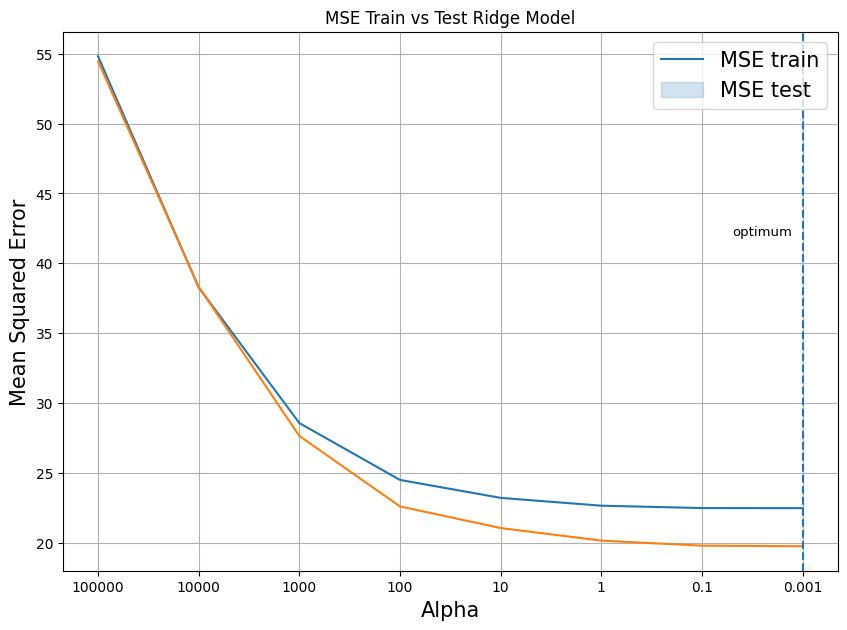

In [53]:
length=range(len(hyperparam_c))

plt.figure(figsize=(10,7))
sns.lineplot(x=length,y=df_ridge['MSE_train'])
sns.lineplot(x=length,y=df_ridge['MSE_test'])
plt.legend(['MSE train', 'MSE test'],fontsize=15,loc='upper right')
plt.xlabel('Alpha',fontsize=15)
plt.ylabel('Mean Squared Error',fontsize=15)
plt.title('MSE Train vs Test Ridge Model')
plt.xticks(length,hyperparam_c)

# # #optimum
text_plot3='optimum'
plt.axvline(x=7,linestyle='--')
plt.text(6.3,42,text_plot3,fontsize=9.5)


plt.grid()
plt.show()

`Insight` : 

1. Saat alpha diatur ke nilai tinggi, model mengalami underfitting, karena eror di data train dan test cukup besar (modelnya terlalu sederhana)

1. Nilai alpha yang rendah dapat mengurangi MSE untuk kedua data, baik train maupun test

1. alpha terbaik untuk kasus ini adalah 0.001, dengan MSE pada data test sebesar 19.77 (ribuan dollar)

# Lasso Regression

In [31]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error

In [50]:
hyperparam_c=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
mse_train=[]
mse_test=[]

for i in hyperparam_c:
    #create model
    lasso=Lasso(alpha=i,random_state=2020)
    #fit model
    lasso.fit(X_train, y_train)
    #predict X_train
    y_pred_train=lasso.predict(X_train)
    mse_train.append(mean_squared_error(y_train,y_pred_train))
    #predict X_test
    y_pred_test=lasso.predict(X_test)
    mse_test.append(mean_squared_error(y_test,y_pred_test))
  
df_lasso=pd.DataFrame({'Alpha':hyperparam_c,'MSE_train':mse_train,'MSE_test':mse_test})
df_lasso


,Alpha,MSE_train,MSE_test
0,100000.000,83.774922,87.387075
1,10000.000,83.774922,87.387075
2,1000.000,83.774922,87.387075
3,100.000,65.948789,67.370527
4,10.000,40.117274,40.674743
5,1.000,27.155613,26.052285
6,0.100,23.545521,21.847323
7,0.001,22.498137,19.788092


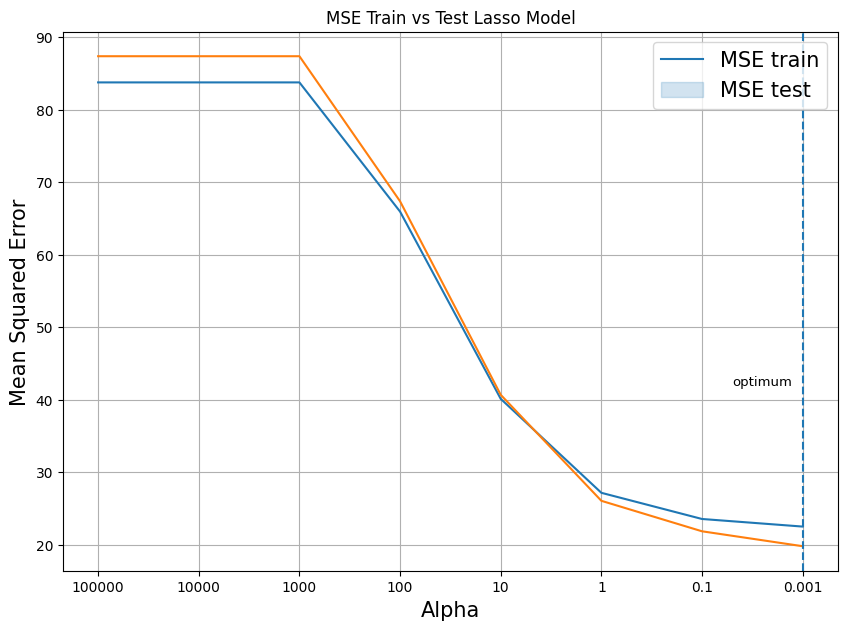

In [51]:
length=range(len(hyperparam_c))

plt.figure(figsize=(10,7))
sns.lineplot(x=length,y=df_lasso['MSE_train'])
sns.lineplot(x=length,y=df_lasso['MSE_test'])
plt.legend(['MSE train', 'MSE test'],fontsize=15,loc='upper right')
plt.xlabel('Alpha',fontsize=15)
plt.ylabel('Mean Squared Error',fontsize=15)
plt.title('MSE Train vs Test Lasso Model')
plt.xticks(length,hyperparam_c)

# # #optimum
text_plot3='optimum'
plt.axvline(x=7,linestyle='--')
plt.text(6.3,42,text_plot3,fontsize=9.5)


plt.grid()
plt.show()

`Insight` : 

1. Saat alpha diatur ke nilai tinggi, model mengalami underfitting, karena eror di data train dan test cukup besar (modelnya terlalu sederhana)

1. Nilai alpha yang rendah dapat mengurangi MSE untuk kedua data, baik train maupun test

1. alpha terbaik untuk kasus ini adalah 0.001, dengan MSE pada data test sebesar 19.79 (ribuan dollar)

Model Complexity in Ridge & Lasso

• Apply Ridge Regression

• Target: house price

• Features: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX,
PTRATIO, B, LSTAT, MEDV

• Using different max_iter (1,2,5,10,20,50,100,200,500,1000), alpha =0.001

• Validate the model using MSE. Split the data into 20% testing data and 80%
training data

• Compare MSE obtained from training data and testing data

• Visualize MSE with subplot(left: Ridge, right : Lasso)


In [57]:
max_iter=[1,2,5,10,20,50,100,200,500,1000]
mse_train_ridge=[]
mse_test_ridge=[]
mse_train_lasso=[]
mse_test_lasso=[]


for i in max_iter:
    #create model
    ridge=Ridge(max_iter=i,alpha=0.001,random_state=2020)
    lasso=Lasso(max_iter=i,alpha=0.001,random_state=2020)
    #fit model
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    #predict X_train
    y_pred_train_ridge=ridge.predict(X_train)
    y_pred_train_lasso=lasso.predict(X_train)
    mse_train_ridge.append(mean_squared_error(y_train,y_pred_train_ridge))
    mse_train_lasso.append(mean_squared_error(y_train,y_pred_train_lasso))
    #predict X_test
    y_pred_test_ridge=ridge.predict(X_test)
    y_pred_test_lasso=lasso.predict(X_test)
    mse_test_ridge.append(mean_squared_error(y_test,y_pred_test_ridge))
    mse_test_lasso.append(mean_squared_error(y_test,y_pred_test_lasso))

df_ridge=pd.DataFrame({'Max Iteration':max_iter,'MSE_train':mse_train_ridge,'MSE_test':mse_test_ridge})
df_lasso=pd.DataFrame({'Max Iteration':max_iter,'MSE_train':mse_train_lasso,'MSE_test':mse_test_lasso})
display(df_ridge,df_lasso)


/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.325e+03, tolerance: 3.385e+00
  model = cd_fast.enet_coordinate_descent(
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.379e+03, tolerance: 3.385e+00
  model = cd_fast.enet_coordinate_descent(
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

,Max Iteration,MSE_train,MSE_test
0,1,22.497767,19.774371
1,2,22.497767,19.774371
2,5,22.497767,19.774371
3,10,22.497767,19.774371
4,20,22.497767,19.774371
5,50,22.497767,19.774371
6,100,22.497767,19.774371
7,200,22.497767,19.774371
8,500,22.497767,19.774371
9,1000,22.497767,19.774371


,Max Iteration,MSE_train,MSE_test
0,1,36.234972,41.132394
1,2,26.598340,24.192239
2,5,22.929206,20.339915
3,10,22.572586,19.950644
4,20,22.502238,19.801556
5,50,22.498148,19.788205
6,100,22.498137,19.788092
7,200,22.498137,19.788092
8,500,22.498137,19.788092
9,1000,22.498137,19.788092


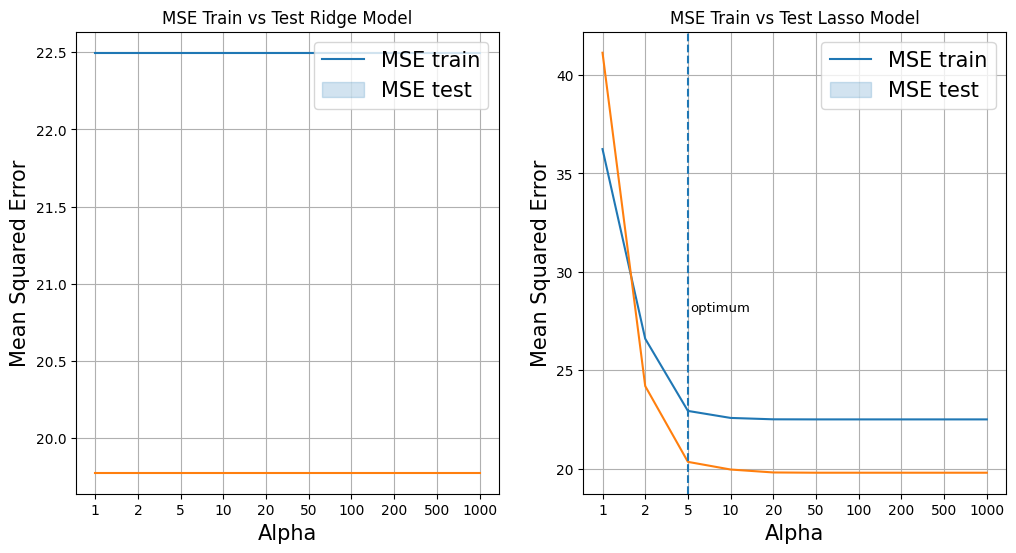

In [87]:

length=range(len(max_iter))

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.lineplot(x=length,y=df_ridge['MSE_train'],ax=ax[0])
sns.lineplot(x=length,y=df_ridge['MSE_test'],ax=ax[0])
ax[0].legend(['MSE train', 'MSE test'],fontsize=15,loc='upper right')
ax[0].set_xlabel('Alpha',fontsize=15)
ax[0].set_ylabel('Mean Squared Error',fontsize=15)
ax[0].set_title('MSE Train vs Test Ridge Model')
ax[0].grid()
ax[0].set_xticks(length,max_iter)

length=range(len(max_iter))
sns.lineplot(x=length,y=df_lasso['MSE_train'],ax=ax[1])
sns.lineplot(x=length,y=df_lasso['MSE_test'],ax=ax[1])
ax[1].legend(['MSE train', 'MSE test'],fontsize=15,loc='upper right')
ax[1].set_xlabel('Alpha',fontsize=15)
ax[1].set_ylabel('Mean Squared Error',fontsize=15)
ax[1].set_title('MSE Train vs Test Lasso Model')
ax[1].grid()
ax[1].set_xticks(length,max_iter)
# # #optimum
text_plot3='optimum'
ax[1].axvline(x=2,linestyle='--')
plt.text(2.05,28,text_plot3,fontsize=9.5)
plt.show()